In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font',family = 'NanumBarunGothic')
plt.rcParams['figure.figsize'] = [30, 50] # 전체 시각화 맵 크기(가로, 세로)
plt.rc('xtick', labelsize = 12) # x축 라벨 크기
plt.rc('ytick', labelsize = 12) # y축 라벨 크기

# **1. 데이터 불러오기**

In [3]:
df = pd.read_csv("./datasets/final2.csv",encoding ="euc-kr")
df.head(10)

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,79,3,65,37,340,7,3,0,...,51,33039,60155,147884,180804,61167,51939,534988,33,18
1,강동구,174,56,1,25,29,270,2,3,1,...,52,33211,39020,130022,147455,67493,47289,464490,12,2
2,강북구,102,56,4,22,13,213,4,3,0,...,52,13243,20362,78696,94561,47245,44515,298622,11,0
3,강서구,188,55,2,36,27,328,4,5,0,...,52,34702,43165,184028,173825,79738,60355,575813,23,8
4,관악구,146,48,1,27,18,252,0,5,0,...,54,19106,27057,204193,134898,60985,54511,500750,9,2
5,광진구,185,38,3,26,21,221,2,4,0,...,54,17359,25131,123028,106294,45120,34141,351073,11,4
6,구로구,163,45,0,13,19,280,5,6,1,...,54,25890,29422,119016,133415,60825,48002,416570,13,5
7,금천구,122,30,1,34,12,178,3,6,0,...,54,11848,14124,77606,76374,36827,27093,243872,4,2
8,노원구,136,45,0,20,16,307,3,3,0,...,53,29100,49687,133684,166527,71351,59337,509686,16,6
9,도봉구,95,40,2,41,13,184,2,6,0,...,53,15953,23787,79509,100618,51773,43244,314884,8,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 71 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   행정구             25 non-null     object 
 1   갈비/삼겹살          25 non-null     int64  
 2   곱창/양구이전문        25 non-null     int64  
 3   기사식당            25 non-null     int64  
 4   기타고기요리          25 non-null     int64  
 5   냉면집             25 non-null     int64  
 6   닭/오리요리          25 non-null     int64  
 7   돌솥/비빕밥전문점       25 non-null     int64  
 8   두부요리전문          25 non-null     int64  
 9   버섯전문점           25 non-null     int64  
 10  별식/퓨전요리         25 non-null     int64  
 11  보리밥전문           25 non-null     int64  
 12  부대찌개/섞어찌개       25 non-null     int64  
 13  부페              25 non-null     int64  
 14  분식              25 non-null     int64  
 15  설렁탕집            25 non-null     int64  
 16  순두부전문           25 non-null     int64  
 17  쌈밥전문            25 non-null     int64

- 총 71개의 컬럼, 결측치는 존재하지 x

# **2. 데이터 분포 확인**

### **2-1. 데이터 왜곡 정도 확인**
- 왜도의 절댓값이 0.5 이상이면 왜곡된 데이터이다.

In [5]:
### 데이터 왜곡 정도 확인

from scipy.stats import skew

features_idx = df.dtypes[df.dtypes != 'object'].index
skew_features = df[features_idx].apply(lambda x:skew(x))
print('전체 왜곡 정도: %f' %skew_features.mean())

전체 왜곡 정도: 1.018088


In [6]:
skew_features = abs(skew_features).sort_values(ascending = False)
print(skew_features)

재첩국전문        4.694855
부대찌개/섞어찌개    2.965599
양식           2.595050
일식/수산물       2.416808
평균소득금액       2.257700
               ...   
총인구          0.055246
두부요리전문       0.050104
60대          0.039582
40 ~ 50대     0.026885
총가구수         0.011622
Length: 69, dtype: float64


- 대부분의 feature들이 왜곡된 분포를 가지고 있음을 확인할 수 있다.

### **2-2. 통계값 확인**

In [7]:
df.describe()

,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,별식/퓨전요리,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.00000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,151.080000,47.720000,2.560000,26.12000,19.400000,227.040000,2.920000,3.680000,0.320000,104.680000,...,55.60000,22627.440000,30468.000000,117881.280000,121178.440000,52243.640000,42886.240000,387285.040000,15.840000,7.040000
std,47.416523,15.504085,2.501333,11.21502,6.244998,56.018211,1.525341,2.014944,0.556776,34.985378,...,3.91578,9279.298842,14173.093049,39901.123404,40911.117016,16830.810388,12401.649794,125804.872677,6.786506,5.012318
min,95.000000,25.000000,0.000000,13.00000,11.000000,128.000000,0.000000,0.000000,0.000000,57.000000,...,51.00000,6520.000000,6938.000000,43092.000000,39138.000000,18495.000000,16581.000000,130764.000000,4.000000,0.000000
25%,116.000000,35.000000,1.000000,20.00000,15.000000,187.000000,2.000000,3.000000,0.000000,82.000000,...,53.00000,17359.000000,23372.000000,92681.000000,95409.000000,41630.000000,37473.000000,314884.000000,11.000000,4.000000
50%,142.000000,45.000000,2.000000,23.00000,19.000000,215.000000,3.000000,4.000000,0.000000,95.000000,...,54.00000,22140.000000,27057.000000,119016.000000,122383.000000,51451.000000,44392.000000,392628.000000,15.000000,6.000000
75%,174.000000,56.000000,3.000000,31.00000,22.000000,259.000000,4.000000,5.000000,1.000000,118.000000,...,58.00000,27745.000000,39020.000000,132113.000000,147455.000000,61301.000000,51351.000000,464490.000000,21.000000,10.000000
max,301.000000,80.000000,9.000000,65.00000,37.000000,340.000000,7.000000,8.000000,2.000000,224.000000,...,66.00000,47196.000000,60155.000000,204193.000000,212357.000000,88693.000000,62360.000000,665847.000000,33.000000,18.000000


### **2-3. 상관계수 확인**

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


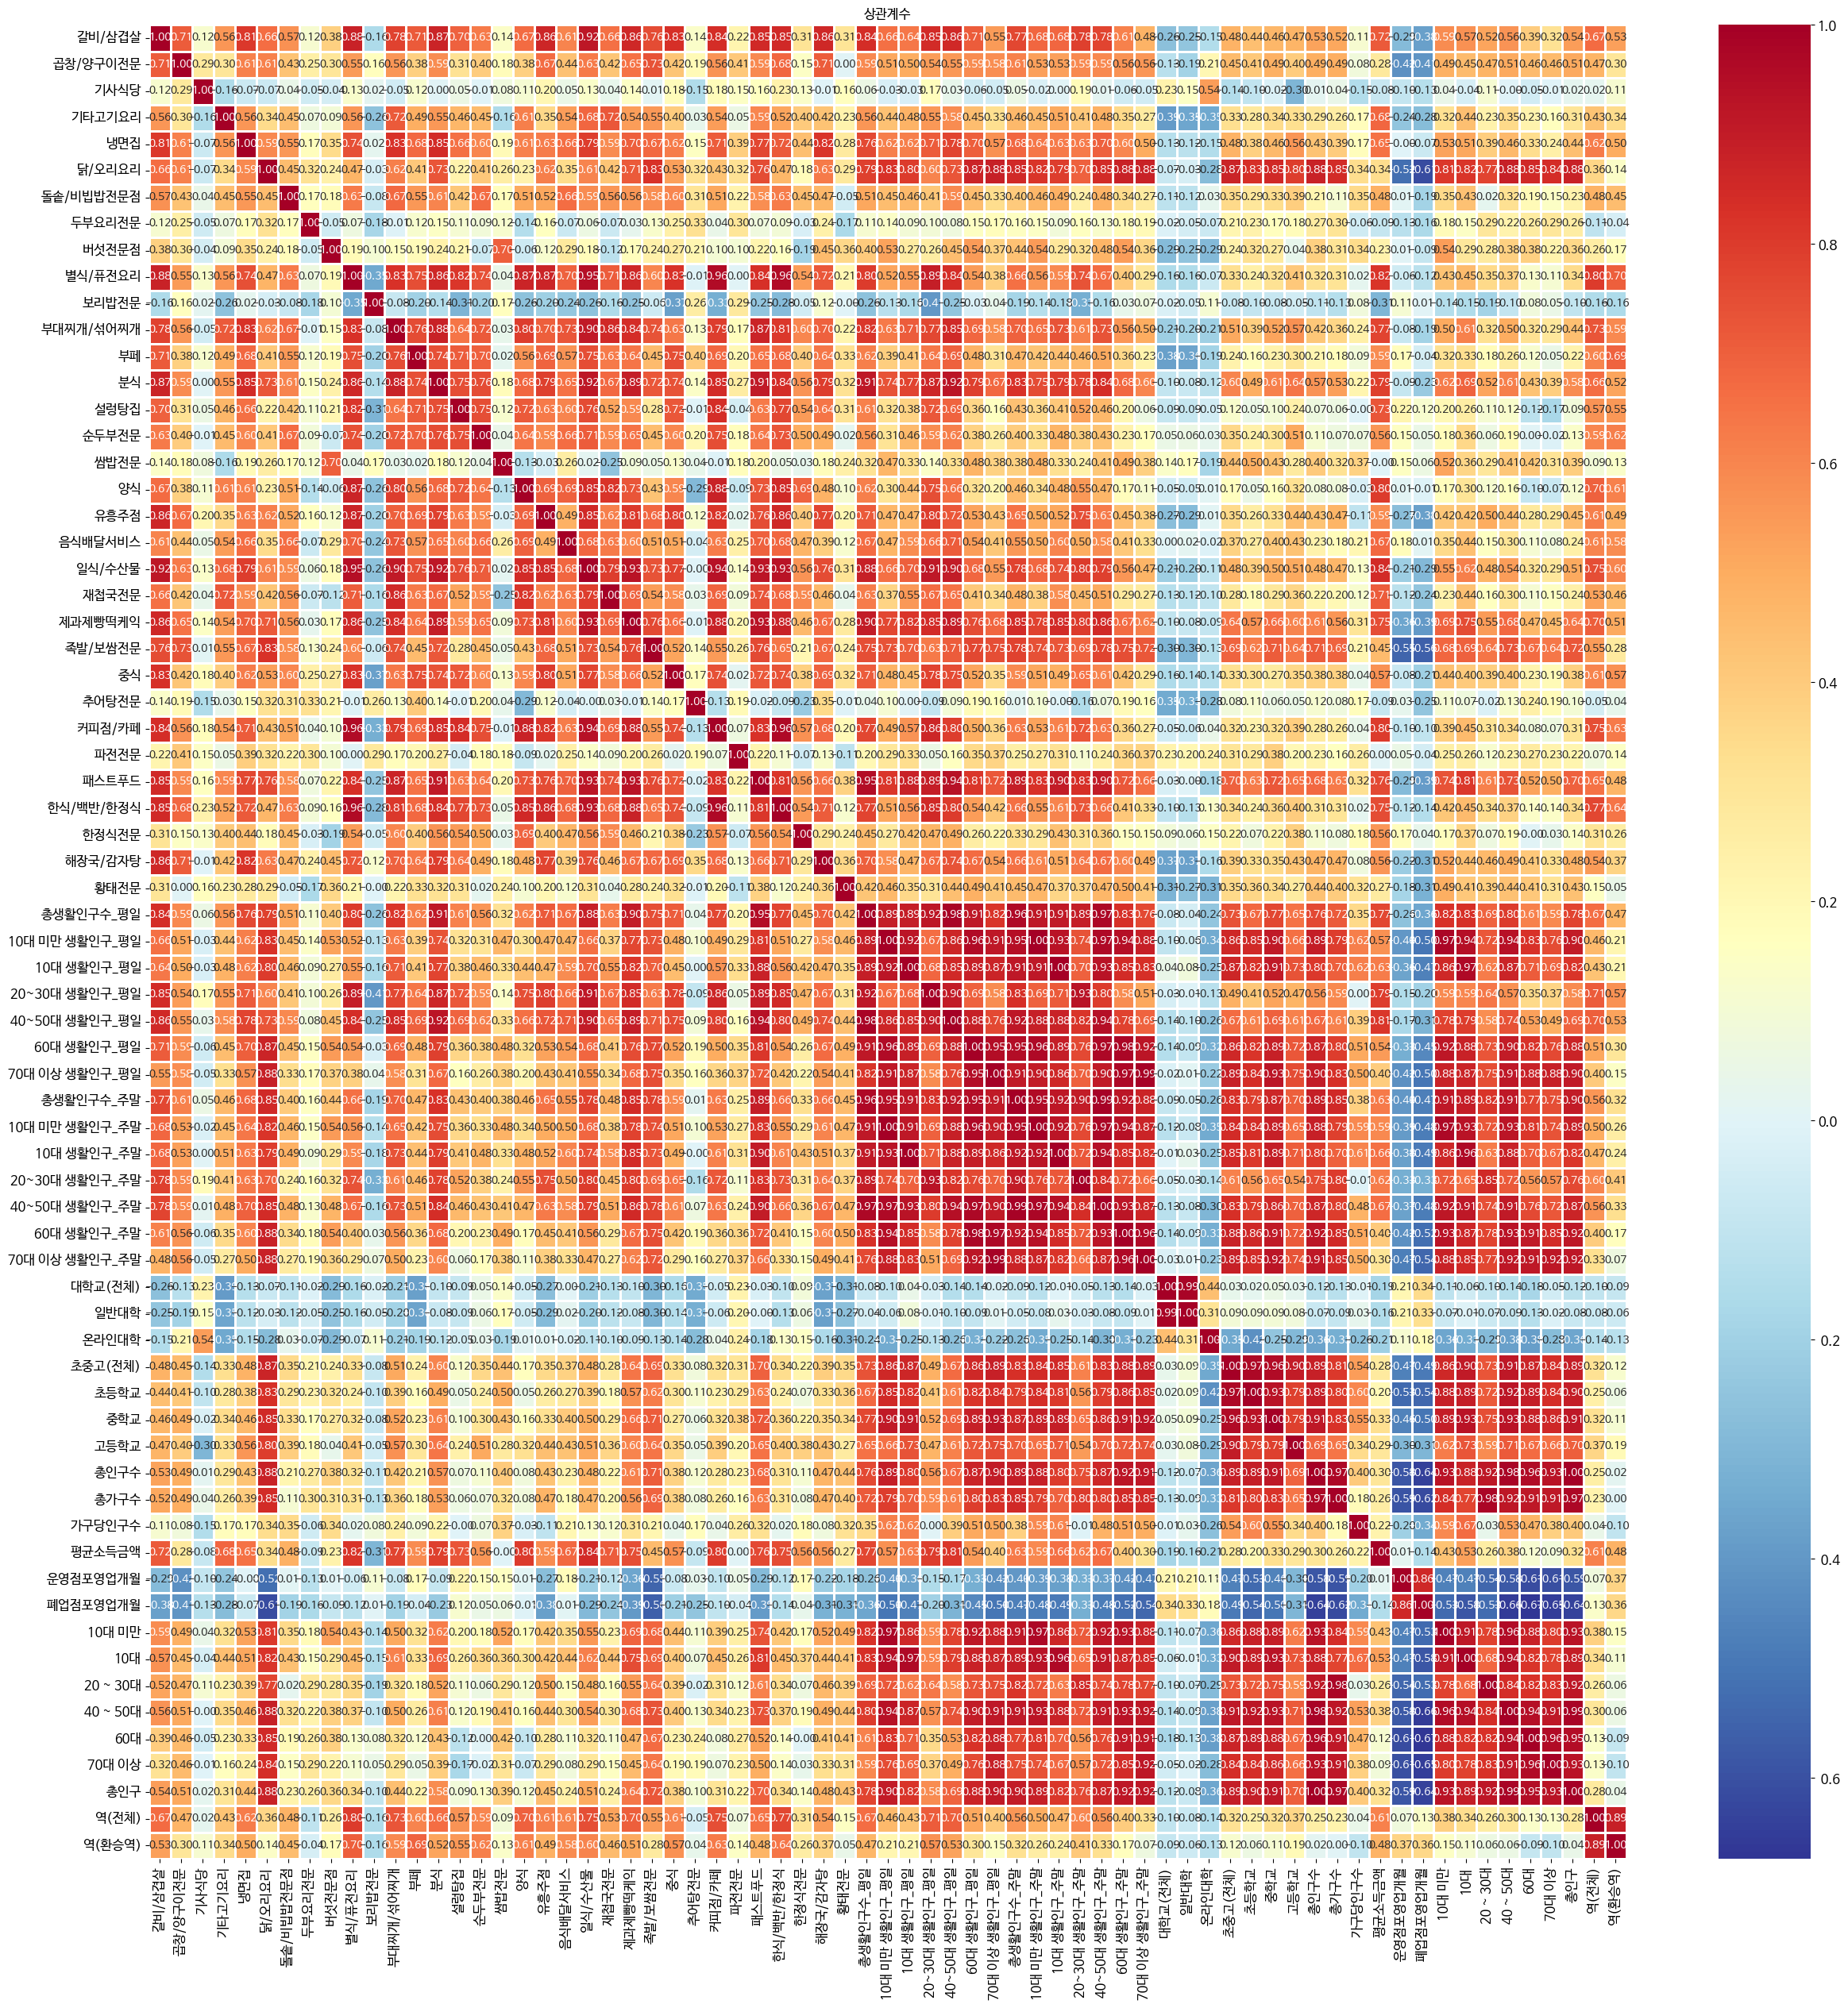

In [8]:
corr = df.corr() # 상관계수

### 히트맵 사이즈 설정
plt.figure(figsize = (30,30))

### 시각화
sns.heatmap(data = corr, # 상관계수 테이블
           annot = True, # 히트맵에 상관계수 값 표시
           fmt = '.2f', # 소수 둘째자리까지 표시
           linewidths = 1., # 경계선
           cmap = 'RdYlBu_r') # colormap 지정
plt.title('상관계수')
plt.show()

# **3. 업종 분포 파악**

### **3-1. 서울시 전체**

c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

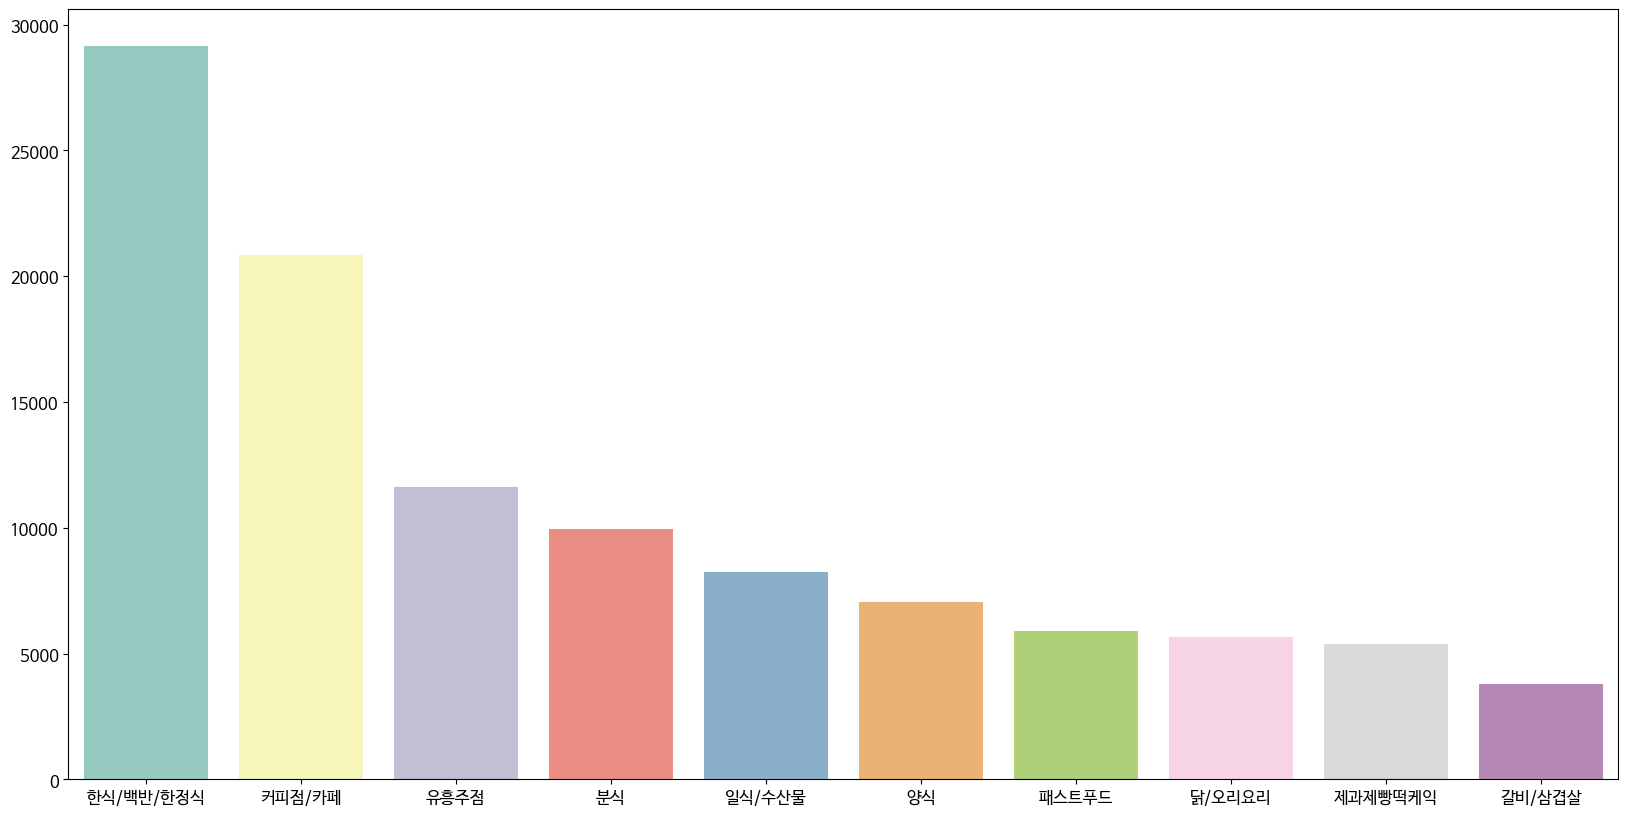

In [9]:
### 34개의 업종 중 상위 10개 업종 파악

y = df.iloc[:,1:34].sum() # 점포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 한식/백반/한정식 음식점과 커피점/카페의 점포 수가 다른 업종들의 2배 이상임을 확인할 수 있다.

### **3-2. 각 행정구 별**

**📌 강남구**

In [10]:
gangnam = df.loc[df['행정구'] == '강남구',:]
gangnam.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
0,강남구,301,79,3,65,37,340,7,3,0,...,51,33039,60155,147884,180804,61167,51939,534988,33,18


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

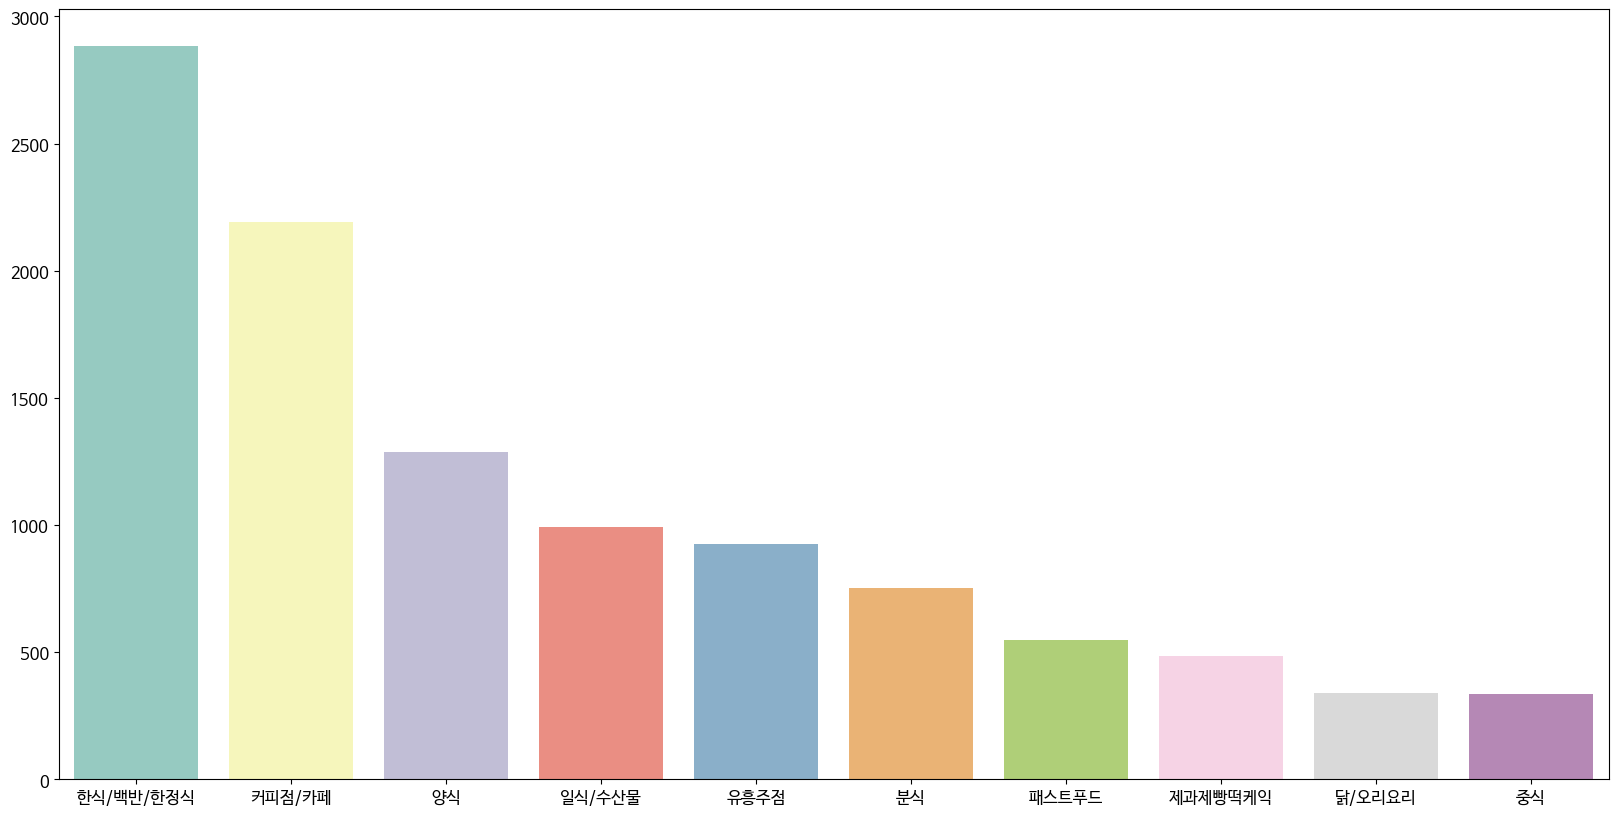

In [11]:
y = gangnam.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체 분포와 비슷하게 한식/백반/한정식 전문 업소와 커피점/카페 전문점이 1,2위를 차지하고 있다.
- 서울시 전체에서는 양식 음식점의 점포 수가 5위였는데, 강남구에서는 3위인 것을 확인할 수 있다.
- 상위 10개의 업소 중 중식이 새로 포함된 것을 확인할 수 있다.

**📌 강동구**

In [12]:
gangdong = df.loc[df['행정구'] == '강동구',:]
gangdong.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
1,강동구,174,56,1,25,29,270,2,3,1,...,52,33211,39020,130022,147455,67493,47289,464490,12,2


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

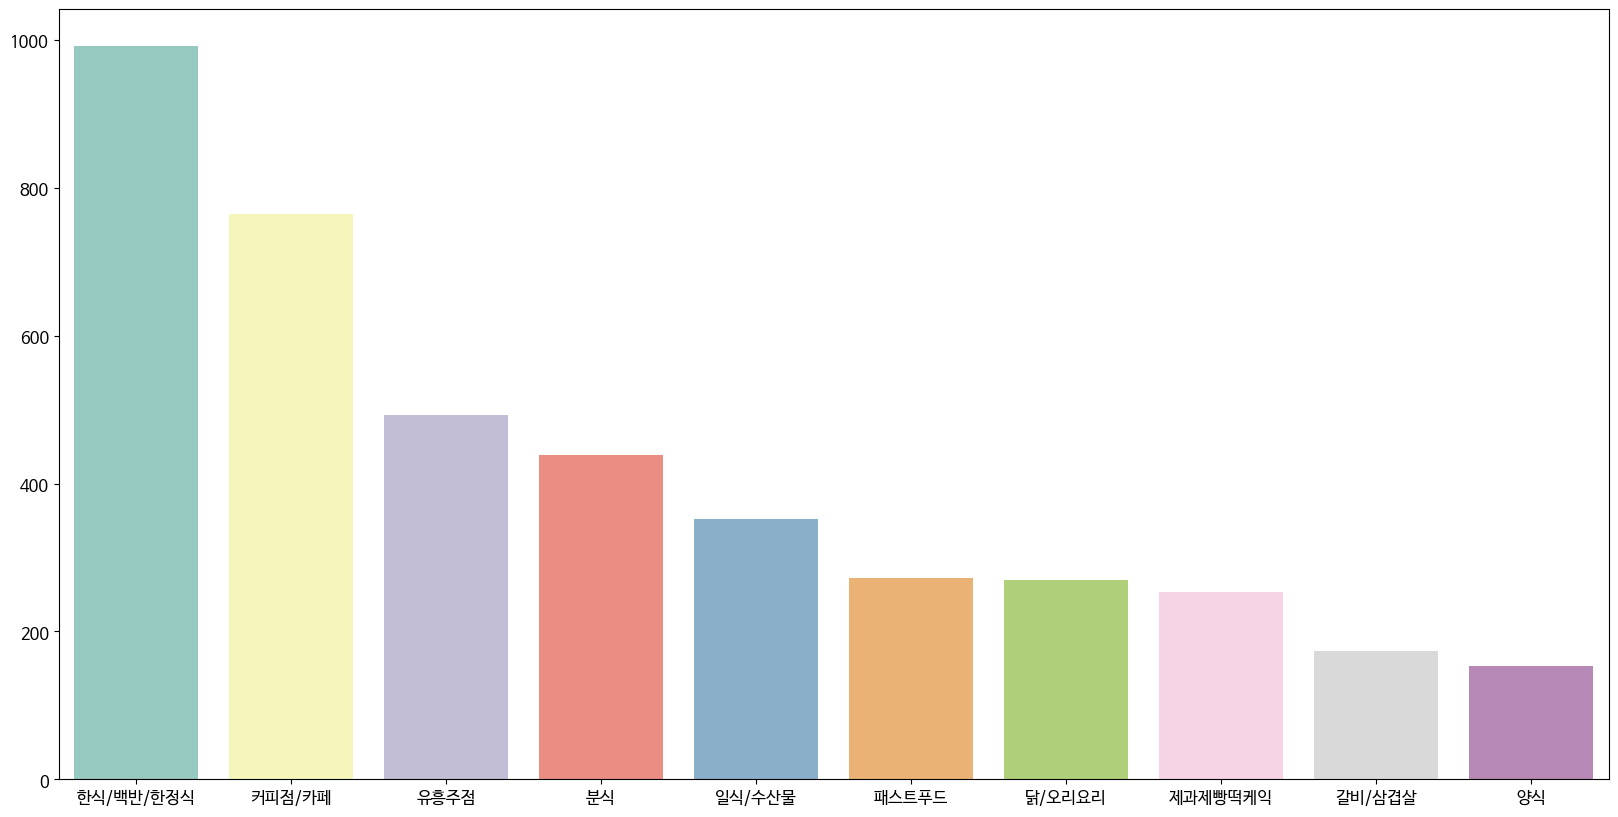

In [13]:
y = gangdong.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체 분포와 비슷한 경향성을 보이고 있다.
- 서울시 전체 분포에 비해 양식 전문점의 비율이 적은 것을 확인할 수 있다.

**📌 강북구**

In [14]:
gangbook = df.loc[df['행정구'] == '강북구',:]
gangbook.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
2,강북구,102,56,4,22,13,213,4,3,0,...,52,13243,20362,78696,94561,47245,44515,298622,11,0


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

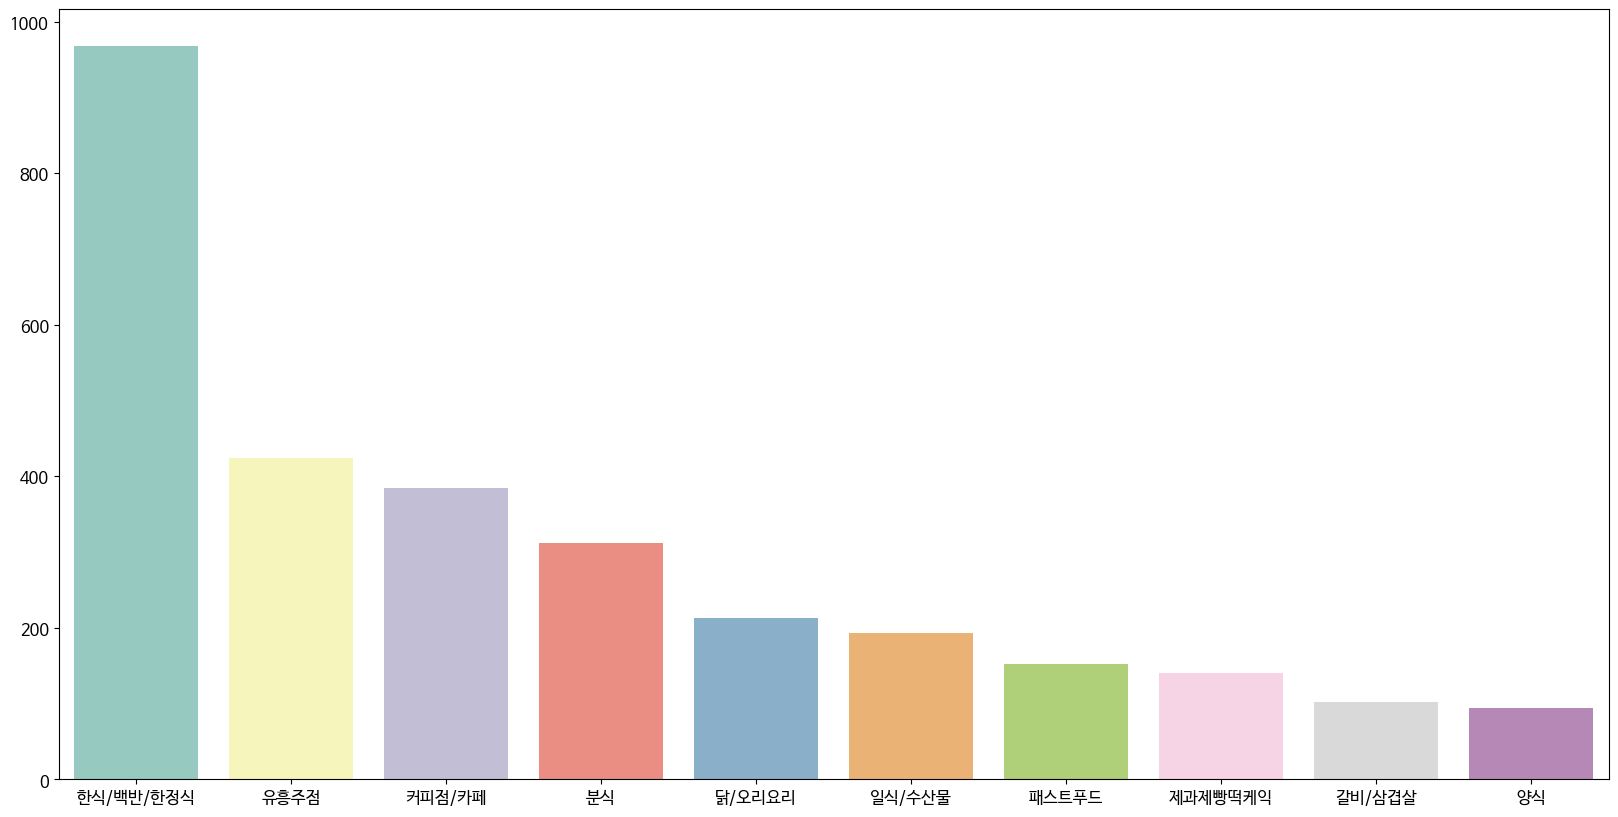

In [15]:
y = gangbook.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체나 다른 행정구들의 경우 한식/백반/한정식 전문점과 커피점/카페 업소 수가 약 1.5배 정도 차이났지만, 강북구의 경우 약 2.5배가 차이난다.
- 닭/오리요리 전문점의 업소 수가 다른 지역에 비해 많은 것을 확인할 수 있다.

**📌 강서구**

In [16]:
gangseo = df.loc[df['행정구'] == '강서구',:]
gangseo.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
3,강서구,188,55,2,36,27,328,4,5,0,...,52,34702,43165,184028,173825,79738,60355,575813,23,8


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

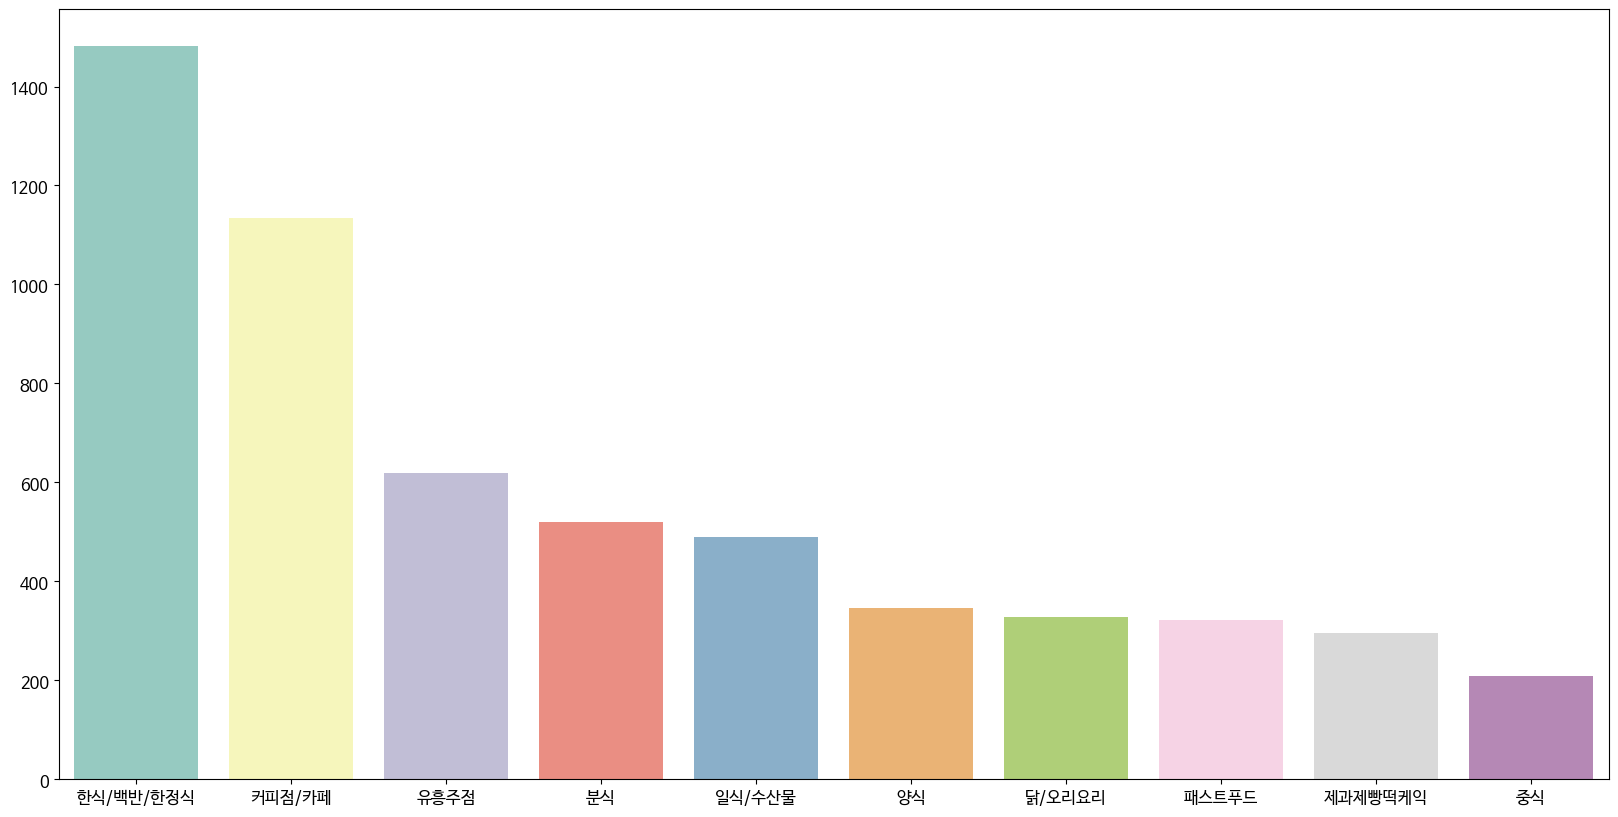

In [17]:
y = gangseo.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체 분포와 비슷한 경향을 보이고 있다.
- 중식 전문점 업소 수가 다른 지역에 비해 많음을 확인할 수 있다.

**📌 관악구**

In [18]:
gwanak = df.loc[df['행정구'] == '관악구',:]
gwanak.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
4,관악구,146,48,1,27,18,252,0,5,0,...,54,19106,27057,204193,134898,60985,54511,500750,9,2


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

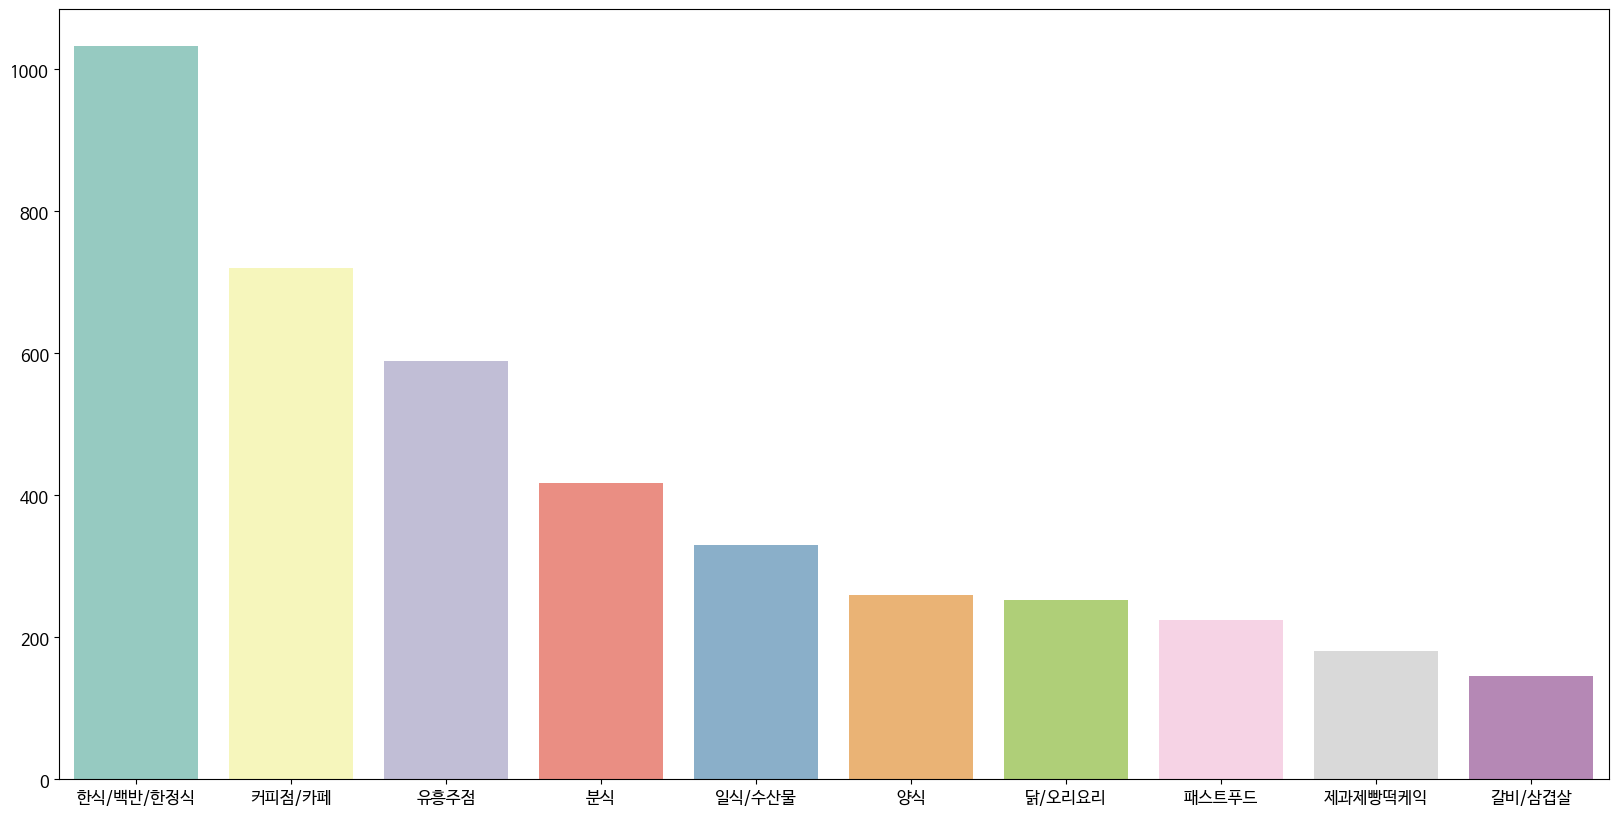

In [19]:
y = gwanak.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체에서의 업소들의 분포 경향과 관악구에서의 업소 분포 경향이 비슷하다.

**📌 광진구**

In [20]:
gwangjin = df.loc[df['행정구'] == '광진구',:]
gwangjin.head()

,행정구,갈비/삼겹살,곱창/양구이전문,기사식당,기타고기요리,냉면집,닭/오리요리,돌솥/비빕밥전문점,두부요리전문,버섯전문점,...,폐업점포영업개월,10대 미만,10대,20 ~ 30대,40 ~ 50대,60대,70대 이상,총인구,역(전체),역(환승역)
5,광진구,185,38,3,26,21,221,2,4,0,...,54,17359,25131,123028,106294,45120,34141,351073,11,4


c:\users\doroc\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

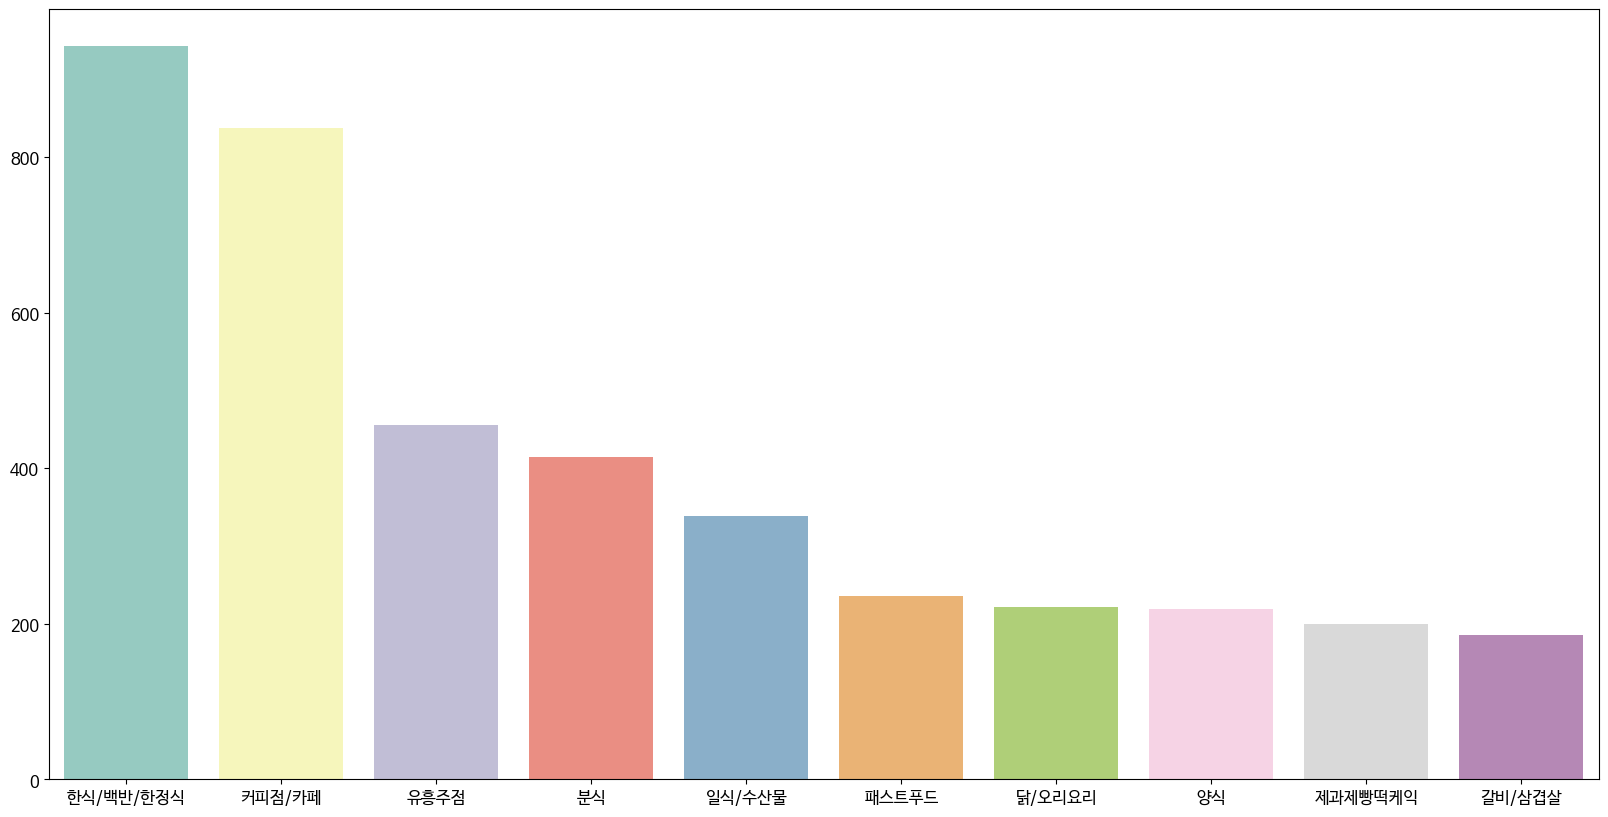

In [21]:
y = gwangjin.iloc[:,1:34].sum() # 접포 수 합계
y = y.sort_values(ascending = False).iloc[:10] # 상위 10개 업종 
x = list(pd.DataFrame(y).index) # 상위 10개 업종명

plt.figure(figsize = (20,10))
sns.barplot(x,y,palette = 'Set3')

- 서울시 전체나 다른 행정구들에 비해 커피점/카페의 업소 수가 많음을 확인할 수 있다.
- 양식 전문점이 다른 지역에 비해 적음을 확인할 수 있다.